Benchmarking % of WalkSAT in Kissat, Daniel Espinosa 2024 UCSB ECE Strukov Group
(Linux)
Intel® Core™ i5-4570 × 4 , 8GB memory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
import xml.etree.ElementTree as Xet

In [33]:
#   Template for parsing data later on
import subprocess
import os

def run_command(x,effort):
    # Use a Linux-compatible path (replace with your actual path)
    directory = "/home/dirac/Documents/UMD-QuICC-instances/UMD-QuICC-instances/batch-06/"
    cnf_file_path = os.path.join(directory, f"stat-hard-4SAT-r-3-020018-0039.cnf")

    # Ensure that 'kissat' is installed and accessible from the command line
    cmd = f"./kissat {cnf_file_path} --statistics=true -v --walkeffort={effort}"
    proc = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out, err = proc.communicate()

    if err:
        print(f"Error executing command for x={x}: {err.decode('utf-8')}")
        return None

    return out.decode('utf-8')

# Example usage
output = run_command(0,10)
print(output)

c ---- [ banner ] ------------------------------------------------------------
c
c Kissat SAT Solver
c 
c Copyright (c) 2021-2023 Armin Biere University of Freiburg
c Copyright (c) 2019-2021 Armin Biere Johannes Kepler University Linz
c 
c Version 3.1.1 71caafb4d182ced9f76cef45b00f37cc598f2a37
c gcc (GCC) 13.2.1 20231205 (Red Hat 13.2.1-6) -W -Wall -O3 -DNDEBUG
c Tue Jan 23 12:35:50 PM EST 2024 Linux dhcp185-117.ece.ucsb.edu 6.5.6-300.fc39.x86_64 x86_64
c
c ---- [ parsing ] -----------------------------------------------------------
c
c opened and reading DIMACS file:
c
c   /home/dirac/Documents/UMD-QuICC-instances/UMD-QuICC-instances/batch-06/stat-hard-4SAT-r-3-020018-0039.cnf
c
c parsed 'p cnf 100 1000' header
c [arena] enlarged to 2 16-byte-words 32 bytes (moved)
c [vectors] enlarged to 4 entries 16 bytes (in place)
c [vectors] enlarged to 8 entries 32 bytes (in place)
c [arena] enlarged to 4 16-byte-words 64 bytes (moved)
c [vectors] enlarged to 16 entries 64 bytes (moved)
c [arena

In [40]:
import re
# New Kissat parser as of April 2024

# Example text data, undo the 'output' equals test to try it
text = output
data = []
"""
c ---- [ profiling ] ---------------------------------------------------------
c           0.50   70.23 %  search
c           0.28   39.72 %  focused
c           0.22   30.49 %  stable
c           0.21   29.68 %  simplify
c =============================================
c           0.72  100.00 %  total
c
c ---- [ statistics ] --------------------------------------------------------
c backbone_computations:                   18             2392.39 interval
c backbone_ticks:                        7106 
c chronological:                            0                0 %  conflicts
c clauses_binary:                           0 
c clauses_irredundant:                   1000 
c clauses_redundant:                     5575 
c conflicts:                            43063            59898.07 per second
c decisions:                            66783                1.55 per conflict
c eliminated:                               0                0 %  variables
c eliminations:                             4            10766    interval
c forward_checks:                       19957 
c forward_steps:                        35133                2    per check
c sweeps:                                  9             4785    interval
c walks:                                    2            21532    interval
c ---- [ resources ] ---------------------------------------------------------
"""

# Regex pattern to match the data lines (this took way too long)
pattern = re.compile(r"^c\s+(\w+.*?):\s*([\d,]+)(?:\s+([\d,.]+))?(?:\s+([\w%]+))?(?:\s+per\s+(\w+))?", re.MULTILINE)

#    Pattern Components for future reference:
#        ^c\s+: Matches lines that start with "c" followed by one or more spaces.
#        (\w+.*?): Captures the label which can be any word character followed by any characters non-greedily.
#        ([\d,]+): Captures the primary numeric value which may include commas for thousands separators.
#        ([\d,.]+): Optionally captures an additional numeric value which may include decimals.
#        ([\w%]+): Optionally captures a unit which might be a word or a percent sign.
#        per\s+(\w+): Optionally captures a rate description after the word "per".

# Finding all matches
matches = pattern.findall(text)

# Parsing the data
parsed_data = []
for match in matches:
    # Structure each match into a dictionary
    item = {
        "label": match[0],
        "value": match[1],
        "additional_value": match[2] if match[2] else None,
        "unit": match[3] if match[3] else None,
        "rate": match[4] if match[4] else None
    }
    parsed_data.append(item)

# fucking hell their -v feature already captures this

#    Pattern Components for future reference:
#        ^c\s+: Matches lines that start with "c" followed by one or more spaces.
#        (\w+.*?): Captures the label which can be any word character followed by any characters non-greedily.
#        ([\d,]+): Captures the primary numeric value which may include commas for thousands separators.
#        ([\d,.]+): Optionally captures an additional numeric value which may include decimals.
#        ([\w%]+): Optionally captures a unit which might be a word or a percent sign.
#        per\s+(\w+): Optionally captures a rate description after the word "per".

pattern_profiling = re.compile(r"^c\s+(\d+\.\d+)\s+(\d+\.\d+)\s+%\s+(.*)", re.MULTILINE)
# AI is better at writing regex than me huh

matches = pattern_profiling.findall(text)

# Parsing the data
parsed_data = []
for match in matches:
    # Structure each match into a dictionary
    item = {
        "time": match[0],
        "percentage": match[1],
        "name": match[2] if match[2] else None,
    }
    parsed_data.append(item)


for data in parsed_data:
   print(data)


{'time': '0.51', 'percentage': '69.94', 'name': 'search'}
{'time': '0.28', 'percentage': '39.39', 'name': 'focused'}
{'time': '0.22', 'percentage': '30.52', 'name': 'stable'}
{'time': '0.22', 'percentage': '29.99', 'name': 'simplify'}
{'time': '0.21', 'percentage': '29.35', 'name': 'probe'}
{'time': '0.14', 'percentage': '19.12', 'name': 'sweep'}
{'time': '0.07', 'percentage': '9.31', 'name': 'vivify'}
{'time': '0.01', 'percentage': '1.06', 'name': 'reduce'}
{'time': '0.01', 'percentage': '0.80', 'name': 'substitute'}
{'time': '0.00', 'percentage': '0.55', 'name': 'eliminate'}
{'time': '0.00', 'percentage': '0.09', 'name': 'walking'}
{'time': '0.00', 'percentage': '0.06', 'name': 'transitive'}
{'time': '0.00', 'percentage': '0.04', 'name': 'parse'}
{'time': '0.00', 'percentage': '0.04', 'name': 'subsume'}
{'time': '0.00', 'percentage': '0.03', 'name': 'backbone'}
{'time': '0.00', 'percentage': '0.00', 'name': 'warmup'}
{'time': '0.72', 'percentage': '100.00', 'name': 'total'}


In [41]:
def parse_output_statistics(raw_cmd_data) -> list:
    text = raw_cmd_data
    pattern = re.compile(r"^c\s+(\w+.*?):\s*([\d,]+)(?:\s+([\d,.]+))?(?:\s+([\w%]+))?(?:\s+per\s+(\w+))?", re.MULTILINE)
    matches = pattern.findall(text)

    # Parsing the data
    parsed_data = []
    for match in matches:
        # Structure each match into a dictionary
        item = {
            "label": match[0],
            "value": match[1],
            "additional_value": match[2] if match[2] else None,
            "unit": match[3] if match[3] else None,
            "rate": match[4] if match[4] else None
        }
        parsed_data.append(item)
    # List of dicts output
    return parsed_data

def parse_output_profiling(raw_cmd_data) -> list:
    text = raw_cmd_data
    pattern_profiling = re.compile(r"^c\s+(\d+\.\d+)\s+(\d+\.\d+)\s+%\s+(.*)", re.MULTILINE)
    matches = pattern_profiling.findall(text)

    # Parsing the data
    parsed_data = []
    for match in matches:
        # Structure each match into a dictionary
        item = {
            "time": match[0],
            "percentage": match[1],
            "name": match[2] if match[2] else None,
        }
        parsed_data.append(item)
    # List of dicts output
    return parsed_data

In [32]:
output = run_command(0,10)
parsed = parse_output_statistics(output)
for i in parsed:
    print(i)

{'label': 'Tue Jan 23 12', 'value': '35', 'additional_value': None, 'unit': None, 'rate': None}
{'label': 'c backbone_computations', 'value': '18', 'additional_value': '2392.39', 'unit': 'interval', 'rate': None}
{'label': 'backbone_ticks', 'value': '7106', 'additional_value': None, 'unit': 'c', 'rate': None}
{'label': 'clauses_binary', 'value': '0', 'additional_value': None, 'unit': 'c', 'rate': None}
{'label': 'clauses_redundant', 'value': '5575', 'additional_value': None, 'unit': 'c', 'rate': None}
{'label': 'decisions', 'value': '66783', 'additional_value': '1.55', 'unit': 'per', 'rate': None}
{'label': 'eliminated', 'value': '0', 'additional_value': '0', 'unit': '%', 'rate': None}
{'label': 'eliminations', 'value': '4', 'additional_value': '10766', 'unit': 'interval', 'rate': None}
{'label': 'eliminate_resolutions', 'value': '17871', 'additional_value': '24504.62', 'unit': 'per', 'rate': None}
{'label': 'forward_checks', 'value': '19957', 'additional_value': None, 'unit': 'c', 'ra

In [34]:
output = run_command(0,10)
parsed = parse_output_statistics(output)

# Generator expression to find dict in list of dicts (VERY USEFUL)
# To find the index of the item use: next((i for i, item in enumerate(dicts) if item["label"] == "walk_steps"), None)
next(item for item in parsed if item["label"] == "walk_steps")


{'label': 'walk_steps',
 'value': '200188',
 'additional_value': None,
 'unit': 'c',
 'rate': None}

In [374]:
import sqlite3
#   Uncomment this to create your own local database, ideally with a different name for each solver

conn = sqlite3.connect('kissat_benchmarking_percentage_walksat.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS kissat_benchmarking_percentage_walksat (
        id INTEGER PRIMARY KEY,
        instance_name TEXT,
        restarts INTEGER,
        num_variables INTEGER,
        num_clauses INTEGER,
        parse_time REAL,
        simplification_time REAL,
        conflicts INTEGER,
        decisions INTEGER,
        propagations INTEGER,
        cpu_time REAL,
        walk_steps INTEGER
    )
''')

# Close the connection
conn.close()#""" 

"\nconn = sqlite3.connect('glucose_data.db')\ncursor = conn.cursor()\n\ncursor.execute('''\n    CREATE TABLE IF NOT EXISTS glucose_data (\n        id INTEGER PRIMARY KEY,\n        instance_name TEXT,\n        restarts INTEGER,\n        num_variables INTEGER,\n        num_clauses INTEGER,\n        parse_time REAL,\n        simplification_time REAL,\n        conflicts INTEGER,\n        decisions INTEGER,\n        propagations INTEGER,\n        cpu_time REAL\n    )\n''')\n\n# Close the connection\nconn.close()"

In [375]:
import os
import glob
import sqlite3
import subprocess

def run_glucose(cnf_file_path):
    
    #   Hacky way to use any .exe file in a cmd prompt since windows is not linux, do not change this or it all stops working
    cmd = f"glucose.exe {cnf_file_path}"
    proc = subprocess.Popen(cmd, shell=True, stdin=subprocess.PIPE, stdout=subprocess.PIPE)
    out, err = proc.communicate()

    if err:
        print(f"Error executing command for file: {cnf_file_path}: {err.decode('utf-8')}")
        return None

    return out.decode('utf-8')

In [376]:
import sqlite3
import os
import glob
#   Assumes other required imports and functions (like run_glucose and parse_output) are already defined

directory = r"C:/.../t3/" # Change to your problem directory with all the files
num_runs_per_instance = 0  # Number of runs per .cnf file, now 0 because when I rerun everything I do not want more data, set to x!=0 to run
last_processed_file = r"C:/.../checkpoint" # Checkpoint system in case it breaks midway
resume_processing = False

#   Connect to the database
conn = sqlite3.connect('glucose_data.db')
cursor = conn.cursor()

# Keep track of files that do not produce any data
non_responsive_files = set()

# Collect all .cnf files in the directory and subdirectories
all_cnf_files = [file for subdir, dirs, files in os.walk(directory) for file in glob.glob(os.path.join(subdir, '*.cnf'))]

# Find the index of the last processed file (if it exists in the list)
if last_processed_file try:
    last_index = all_cnf_files.index(last_processed_file)
except ValueError:
    last_index = -1  # If the last processed file is not found, start from the beginning

# Iterate through all .cnf files starting from the file after the last processed one
for file in all_cnf_files[last_index + 1:]:
    if file in non_responsive_files:
        print(f"Skipping non-responsive file: {file}")
        continue
    if num_runs_per_instance == 0:
        break

    for run in range(num_runs_per_instance):
        output = run_glucose(file)
        if output:
            data = parse_output(output)

            if data:
                try:
                    instance_name = os.path.basename(file)  # Extract the filename
                    cursor.execute('''
                        INSERT INTO glucose_data (
                            instance_name,
                            restarts,
                            num_variables, 
                            num_clauses, 
                            parse_time, 
                            simplification_time, 
                            conflicts, 
                            decisions, 
                            propagations, 
                            cpu_time
                        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
                    ''', (
                        instance_name,
                        data.get('restarts'),
                        data.get('num_variables'), 
                        data.get('num_clauses'), 
                        data.get('parse_time'), 
                        data.get('simplification_time'), 
                        data.get('conflicts'), 
                        data.get('decisions'), 
                        data.get('propagations'), 
                        data.get('cpu_time')
                    ))
                    conn.commit()
                except Exception as e:
                    print(f"Error inserting data for file {file} on run {run}: {e}")
            else:
                if run == 0:
                    non_responsive_files.add(file)
                    print(f"No data extracted for file {file} on first run, skipping subsequent runs.")
                    break
                print(f"No data extracted for file {file} on run {run}")
        else:
            print(f"No output for file {file} on run {run}")

# Close the connection
conn.close()

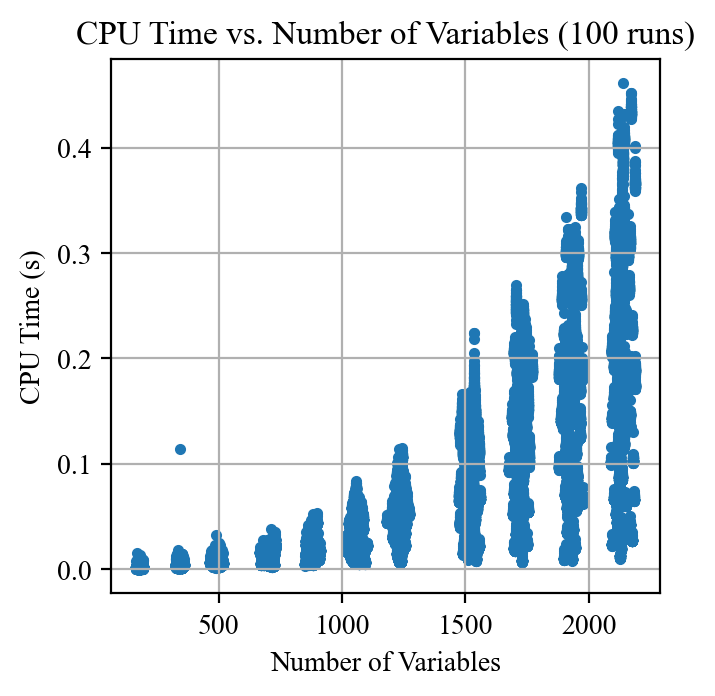

In [377]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('glucose_data.db')

# Load the data into a pd DataFrame
query = 'SELECT cpu_time FROM glucose_data'
x = pd.read_sql_query(query, conn)

query = 'SELECT num_variables FROM glucose_data'
y = pd.read_sql_query(query, conn)

# Display the pd DataFrame
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(3.54,3.54), dpi=200)


#plt.figure(figsize=(10, 6))
plt.scatter(y, x, marker='.')
plt.title('CPU Time vs. Number of Variables (100 runs)')
plt.xlabel('Number of Variables')
plt.ylabel('CPU Time (s)')
plt.grid(True)
plt.show()

# Close the connection
conn.close()

In [378]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database and fetch the data
conn = sqlite3.connect('glucose_data.db')
df = pd.read_sql_query('SELECT instance_name, cpu_time FROM glucose_data', conn)
conn.close()

# Calculate the average CPU time for each instance
avg_cpu_times = df.groupby('instance_name')['cpu_time'].mean().reset_index()

# Sort the instances based on their average solve time
sorted_avg_cpu_times = avg_cpu_times.sort_values(by='cpu_time')

In [379]:
sum(avg_cpu_times["cpu_time"]) #on average, it took 67.44 seconds of CPU time to solve all the instances once

67.4385634754771

In [380]:
max(avg_cpu_times["cpu_time"])

0.4350582524271844

In [381]:
# Plot is saying okay, the max is 0.43 seconds, everything else is a ratio of that, that's not what we want
# instance / max(all_instances) tells you it took % of time of it, we care about the integral underneath the curve, plotting

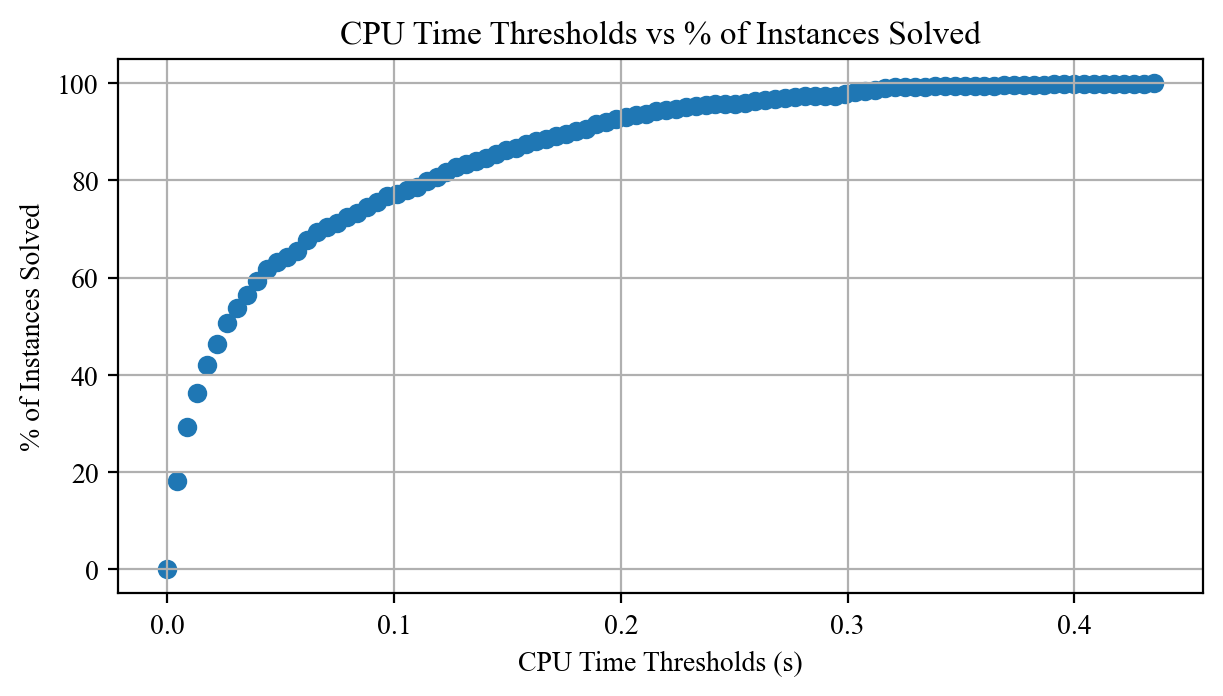

In [382]:
avg_cpu_times_sorted = avg_cpu_times.sort_values('cpu_time')

# Define discrete time intervals for treshhold plotter
max_time = avg_cpu_times['cpu_time'].max()
time_intervals = np.linspace(0, max_time, 100)  # Creates 100 evenly spaced time intervals up to the maximum time

# Calculate the percentage of instances solved for each interval
percent_solved = [100 * (avg_cpu_times['cpu_time'] <= t).mean() for t in time_intervals]

# Plotting
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(7,3.54), dpi=200)
plt.scatter(time_intervals, percent_solved, marker='o')
plt.xlabel('CPU Time Thresholds (s)')
plt.ylabel('% of Instances Solved')
plt.title('CPU Time Thresholds vs % of Instances Solved')
plt.grid(True)
plt.show()


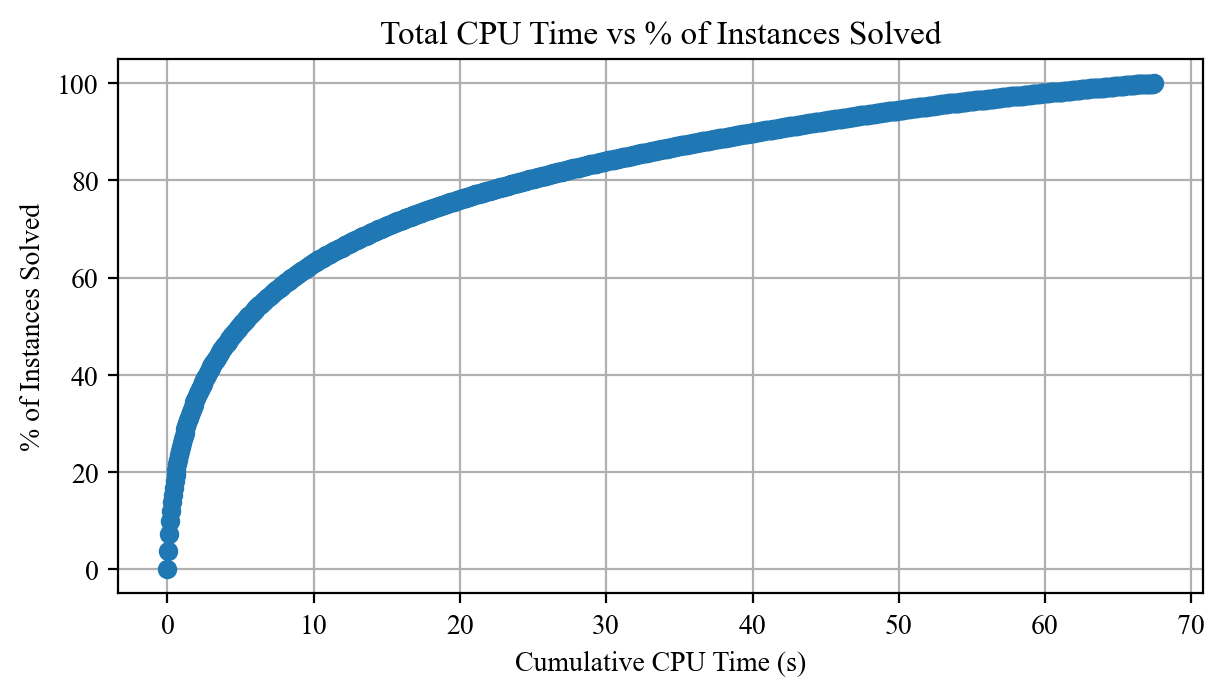

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Sort the pd DataFrame by cpu_time
avg_cpu_times_sorted = avg_cpu_times.sort_values('cpu_time')

# Calculate cumulative CPU time
avg_cpu_times_sorted['cumulative_cpu_time'] = avg_cpu_times_sorted['cpu_time'].cumsum()

# Calculate the percentage of instances solved up to each point
avg_cpu_times_sorted['percent_solved'] = 100 * (avg_cpu_times_sorted.index + 1) / len(avg_cpu_times_sorted)

# Total sum of CPU time
sum_time = avg_cpu_times_sorted['cumulative_cpu_time'].iloc[-1]

# Define discrete time intervals as per NASA/UMD
time_intervals = np.linspace(0, sum_time, len(avg_cpu_times_sorted))  # Use the actual cumulative times

# Calculate percentage of instances solved for each interval
percent_solved = []
for t in time_intervals:
    percent_solved.append(100 * (avg_cpu_times_sorted['cumulative_cpu_time'] <= t).sum() / len(avg_cpu_times_sorted))

# Plotting settings
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'

# Plotting
plt.figure(figsize=(7, 3.54), dpi=200)
plt.plot(time_intervals, percent_solved, marker='o') 
plt.xlabel('Cumulative CPU Time (s)')
plt.ylabel('% of Instances Solved')
plt.title('Total CPU Time vs % of Instances Solved')
plt.grid(True)
plt.show()

In [384]:
sum(avg_cpu_times['cpu_time'])

67.4385634754771

In [385]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database and fetch the data
conn = sqlite3.connect('glucose_data.db')
df = pd.read_sql_query('SELECT instance_name, cpu_time FROM glucose_data', conn)
conn.close()

# Calculate the min and max CPU time for each instance
min_cpu_times = df.groupby('instance_name')['cpu_time'].min().reset_index()
max_cpu_times = df.groupby('instance_name')['cpu_time'].max().reset_index()

# Sort the instances based on solve times
sorted_avg_cpu_times = avg_cpu_times.sort_values(by='cpu_time')
min_cpu_times = min_cpu_times.sort_values(by='cpu_time')
max_cpu_times = max_cpu_times.sort_values(by='cpu_time')

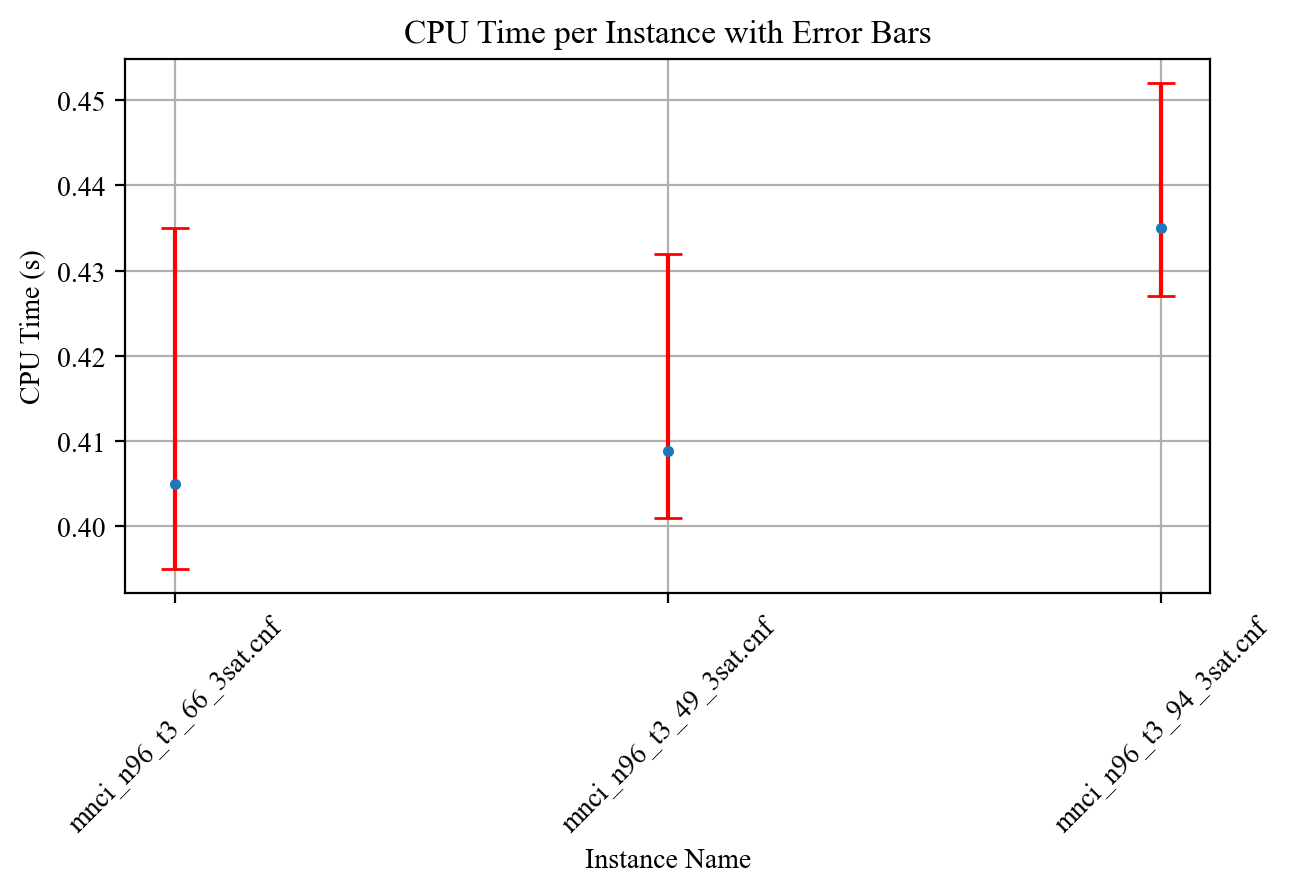

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import matplotlib as mpl

# Assuming pd df now has multiple cpu_time values for each instance_name
# Group by instance_name to calculate mean and standard deviation for each instance
stats_df = df.groupby('instance_name').agg(['mean', 'std', 'count'])

# Sort the instances by increasing average time to solution
stats_df = stats_df.sort_values(('cpu_time', 'mean'))

# Define the indices of the values you want to plot
selected_indices = [1097, 1098, 1099]  # Change as needed, for all use range(1110) etc.

# Subset the stats_df pd DataFrame to include only selected indices
selected_stats_df = stats_df.iloc[selected_indices]

# Calculate asymmetric error for the selected data points (where we see the max amount vs the min amount of time to solution)
min_cpu_times = df.groupby('instance_name')['cpu_time'].min()
max_cpu_times = df.groupby('instance_name')['cpu_time'].max()

asymmetric_error = [
    selected_stats_df[('cpu_time', 'mean')] - min_cpu_times[selected_stats_df.index],
    max_cpu_times[selected_stats_df.index] - selected_stats_df[('cpu_time', 'mean')]
]

# Extract instance names for the selected instances
selected_instance_names = selected_stats_df.index

# Plotting settings
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'

# Plotting
plt.figure(figsize=(7, 3.54), dpi=200)

# Plotting
plt.errorbar(
    x=selected_instance_names,  # X-axis: Instance names
    y=selected_stats_df[('cpu_time', 'mean')],  # Y-axis: Mean CPU time
    yerr=asymmetric_error,  # Error: Asymmetric error for selected data
    fmt='.',  # Format string for the points
    ecolor='red',  # Color of the error bars
    capsize=5  # Caps on the error bars
)

plt.xlabel('Instance Name')
plt.ylabel('CPU Time (s)')
plt.title('CPU Time per Instance with Error Bars')
plt.grid(True)

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

plt.show()

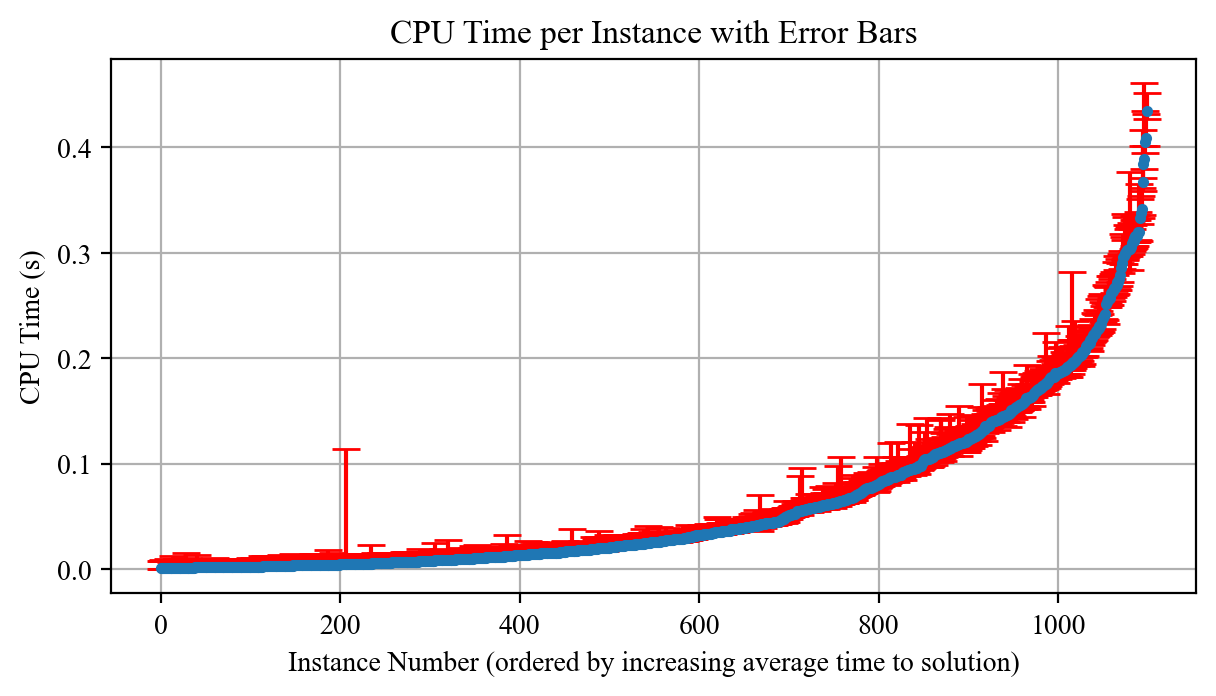

In [387]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import matplotlib as mpl

# Assuming df now has multiple cpu_time values for each instance_name
# Group by instance_name to calculate mean and standard deviation for each instance
stats_df = df.groupby('instance_name').agg(['mean', 'std', 'count'])

# Sort the instances by increasing average time to solution
stats_df = stats_df.sort_values(('cpu_time', 'mean'))

# Define the indices of the 10 values you want to plot
selected_indices = range(1100)  # Change these indices as needed

# Subset the stats_df DataFrame to include only the selected indices
selected_stats_df = stats_df.iloc[selected_indices]

# Calculate asymmetric error for the selected data points
min_cpu_times = df.groupby('instance_name')['cpu_time'].min()
max_cpu_times = df.groupby('instance_name')['cpu_time'].max()

asymmetric_error = [
    selected_stats_df[('cpu_time', 'mean')] - min_cpu_times[selected_stats_df.index],
    max_cpu_times[selected_stats_df.index] - selected_stats_df[('cpu_time', 'mean')]
]

# Plotting settings
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'

# Plotting
plt.figure(figsize=(7, 3.54), dpi=200)

# Plotting
plt.errorbar(
    x=range(len(selected_stats_df)),  # X-axis: Instance number after sorting
    y=selected_stats_df[('cpu_time', 'mean')],  # Y-axis: Mean CPU time
    yerr=asymmetric_error,  # Error: Asymmetric error for selected data
    fmt='.',  # Format string for the points
    ecolor='red',  # Color of the error bars
    capsize=5  # Caps on the error bars
)

plt.xlabel('Instance Number (ordered by increasing average time to solution)')
plt.ylabel('CPU Time (s)')
plt.title('CPU Time per Instance with Error Bars')
plt.grid(True)
plt.show()

In [388]:
stats_df.keys()

MultiIndex([('cpu_time',  'mean'),
            ('cpu_time',   'std'),
            ('cpu_time', 'count')],
           )

In [389]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('glucose_data.db')

# Prepare the query to select data for a specific instance_name
instance_to_query = 'mnci_n24_t3_1_3sat.cnf'  # Specify the instance_name you want to query
query = f"SELECT * FROM glucose_data WHERE instance_name = '{instance_to_query}'"

# Load the data into a pandas DataFrame
x = pd.read_sql_query(query, conn)

# Display the DataFrame
print(x)

# Close the database connection
conn.close()

        id  num_variables  num_clauses  parse_time  simplification_time  \
0      112            331         1169        0.01                  0.0   
1     1245            331         1169        0.00                  0.0   
2     2345            331         1169        0.00                  0.0   
3    14434            331         1169        0.00                  0.0   
4    14435            331         1169        0.00                  0.0   
..     ...            ...          ...         ...                  ...   
98   14529            331         1169        0.00                  0.0   
99   14530            331         1169        0.00                  0.0   
100  14531            331         1169        0.00                  0.0   
101  14532            331         1169        0.00                  0.0   
102  14533            331         1169        0.00                  0.0   

     conflicts  decisions  propagations  cpu_time           instance_name  \
0           45        

In [390]:
x.keys()

Index(['id', 'num_variables', 'num_clauses', 'parse_time',
       'simplification_time', 'conflicts', 'decisions', 'propagations',
       'cpu_time', 'instance_name', 'restarts'],
      dtype='object')

In [391]:
def calculate_energy_usage_joules(cpu_time_seconds, average_power_watts):
    # 1 Watt = 1 Joule/second
    energy_joules = average_power_watts * cpu_time_seconds

    return energy_joules

# Example
cpu_time_seconds = 0.5 
average_power_watts = 45  # Replace with the average power consumption in watts (TDP or measured value) of your specific CPU

# Once we are using analog devices or doing approximation prblems, we expect this relationship to be nonlinear
# then we can keep track of "average_power_watts" as a variable of interest in our SQL database !!!

energy_usage_joules = calculate_energy_usage_joules(cpu_time_seconds, average_power_watts)
print(f"Energy Usage: {energy_usage_joules} Joules")

Energy Usage: 22.5 Joules


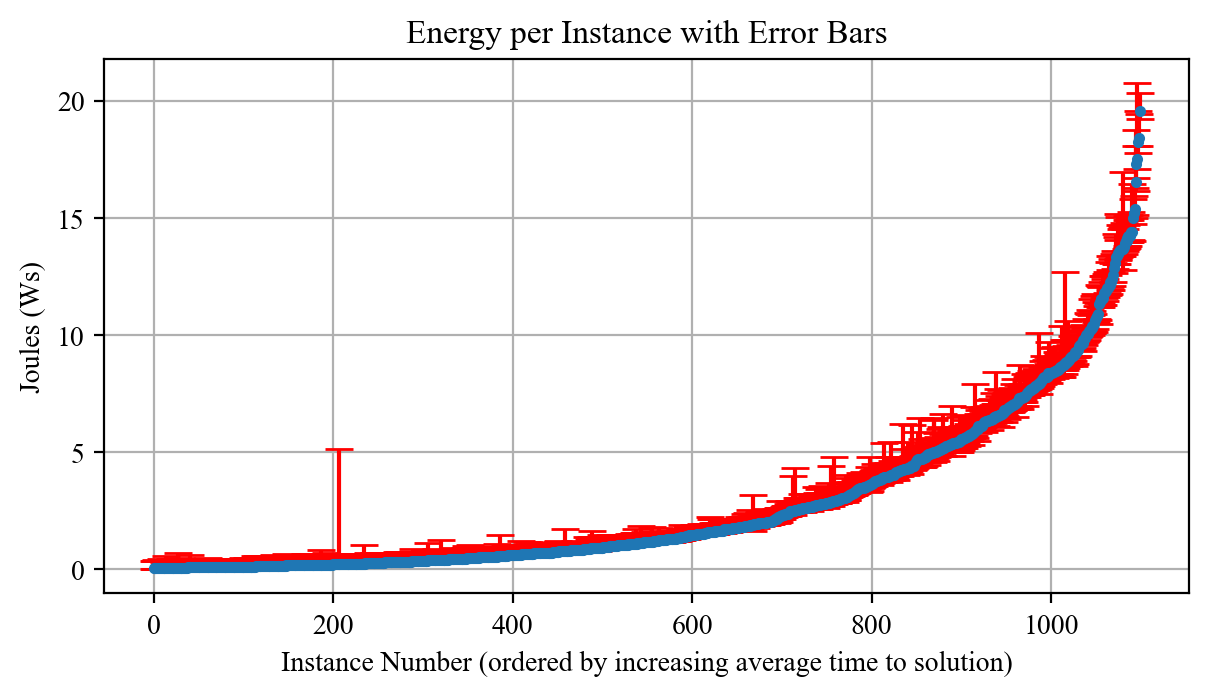

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import matplotlib as mpl

# Function to calculate energy usage in Joules
def calculate_energy_usage_joules(cpu_time_seconds, average_power_watts):
    energy_joules = average_power_watts * cpu_time_seconds
    return energy_joules


average_power_watts = 45  # Replace with actual average power consumption in watts for given CPU
df['energy_usage_joules'] = df['cpu_time'].apply(lambda x: calculate_energy_usage_joules(x, average_power_watts))


# Assuming 'df' now has multiple cpu_time values for each instance_name
# Group by instance_name to calculate mean and standard deviation for each instance
stats_df = df.groupby('instance_name').agg(['mean', 'std', 'count'])

# Sort the instances by increasing average energy to solution
stats_df = stats_df.sort_values(('energy_usage_joules', 'mean'))

# Define the indices of the values we want to plot
selected_indices = range(1100)   

# Subset the stats_df DataFrame to include only the selected indices
selected_stats_df = stats_df.iloc[selected_indices]

# Calculate the asymmetric error for the selected data points
min_energy_use = df.groupby('instance_name')['energy_usage_joules'].min()
max_energy_use = df.groupby('instance_name')['energy_usage_joules'].max()

asymmetric_error_energy = [
    selected_stats_df[('energy_usage_joules', 'mean')] - max_energy_use[selected_stats_df.index],
    min_energy_use[selected_stats_df.index] - selected_stats_df[('energy_usage_joules', 'mean')]
]

# Plotting settings
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'

# Plotting
plt.figure(figsize=(7, 3.54), dpi=200)

# Plotting
plt.errorbar(
    x=range(len(selected_stats_df)),  # X-axis: Instance number after sorting
    y=selected_stats_df[('energy_usage_joules', 'mean')],  # Y-axis: Mean CPU time
    yerr=asymmetric_error_energy,  # Error: Asymmetric error for selected data
    fmt='.',  # Format string for the points
    ecolor='red',  # Color of the error bars
    capsize=5  # Caps on the error bars
)

plt.xlabel('Instance Number (ordered by increasing average time to solution)')
plt.ylabel('Joules (Ws)')
plt.title('Energy per Instance with Error Bars')
plt.grid(True)
plt.show()



In [404]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import matplotlib as mpl
#   Uncomment to splice the data and plot only some subsections, issue is it also removes it for the below plot, hence commented out
"""
# Assuming 'df' now has multiple cpu_time values for each instance_name
# Group by instance_name to calculate mean and standard deviation for each instance
stats_df = df.groupby('instance_name').agg(['mean', 'std', 'count'])

# Sort the instances by increasing average time to solution
stats_df = stats_df.sort_values(('energy_usage_joules', 'mean'))

# Define the indices of the 10 values you want to plot
selected_indices = [1097, 1098, 1099]  # Change these indices as needed

# Subset the stats_df DataFrame to include only the selected indices
selected_stats_df = stats_df.iloc[selected_indices]

# Calculate the asymmetric error for the selected data points
min_cpu_times = df.groupby('instance_name')['energy_usage_joules'].min()
max_cpu_times = df.groupby('instance_name')['energy_usage_joules'].max()

asymmetric_error = [
    selected_stats_df[('energy_usage_joules', 'mean')] - min_cpu_times[selected_stats_df.index],
    max_cpu_times[selected_stats_df.index] - selected_stats_df[('energy_usage_joules', 'mean')]
]

# Extract instance names for the selected instances
selected_instance_names = selected_stats_df.index

# Plotting settings
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'

# Plotting
plt.figure(figsize=(7, 3.54), dpi=200)

# Plotting
plt.errorbar(
    x=selected_instance_names,  # X-axis: Instance names
    y=selected_stats_df[('energy_usage_joules', 'mean')],  # Y-axis: Mean CPU time
    yerr=asymmetric_error,  # Error: Asymmetric error for selected data
    fmt='.',  # Format string for the points
    ecolor='red',  # Color of the error bars
    capsize=5  # Caps on the error bars
)

plt.xlabel('Instance Name')
plt.ylabel('Joules (Ws)')
plt.title('Energy per Instance with Error Bars')
plt.grid(True)

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

plt.show()"""

"\n# Assuming 'df' now has multiple cpu_time values for each instance_name\n# Group by instance_name to calculate mean and standard deviation for each instance\nstats_df = df.groupby('instance_name').agg(['mean', 'std', 'count'])\n\n# Sort the instances by increasing average time to solution\nstats_df = stats_df.sort_values(('energy_usage_joules', 'mean'))\n\n# Define the indices of the 10 values you want to plot\nselected_indices = [1097, 1098, 1099]  # Change these indices as needed\n\n# Subset the stats_df DataFrame to include only the selected indices\nselected_stats_df = stats_df.iloc[selected_indices]\n\n# Calculate the asymmetric error for the selected data points\nmin_cpu_times = df.groupby('instance_name')['energy_usage_joules'].min()\nmax_cpu_times = df.groupby('instance_name')['energy_usage_joules'].max()\n\nasymmetric_error = [\n    selected_stats_df[('energy_usage_joules', 'mean')] - min_cpu_times[selected_stats_df.index],\n    max_cpu_times[selected_stats_df.index] - sele

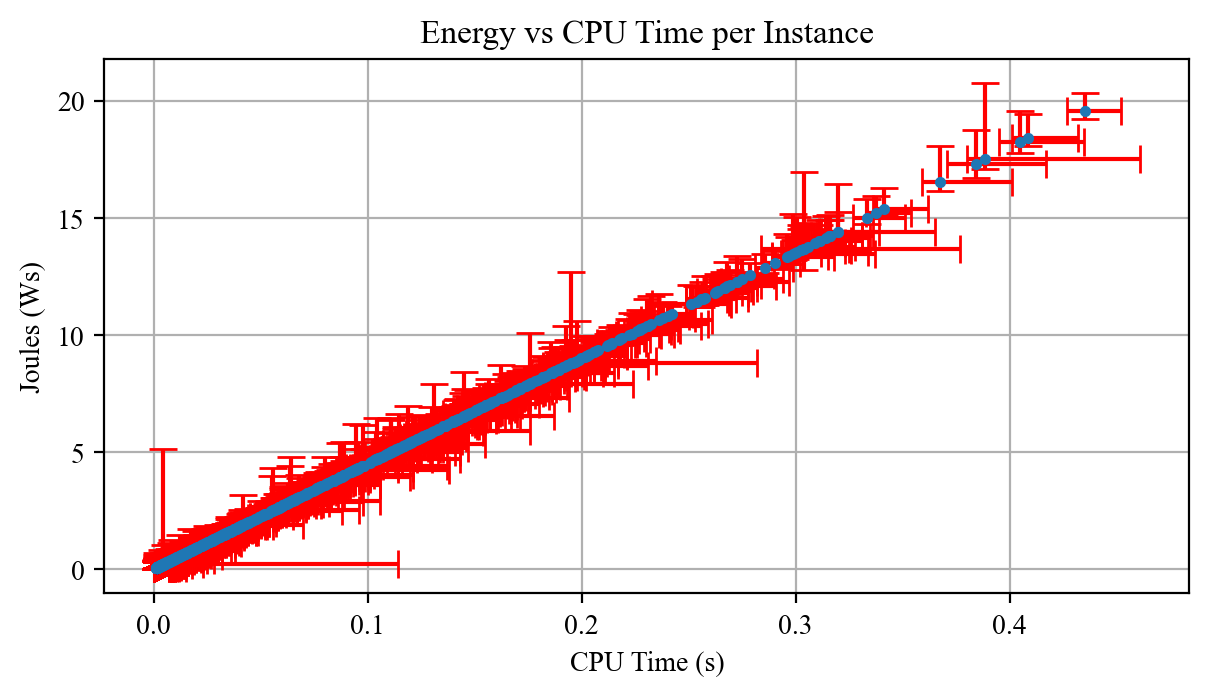

In [402]:
# now putting it all together, energy vs time plot :

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import matplotlib as mpl

# Plotting
plt.figure(figsize=(7, 3.54), dpi=200)

# Define the indices of the values we want to plot
selected_indices = range(1100)   

# Subset the stats_df DataFrame to include only the selected indices
selected_stats_df = stats_df.iloc[selected_indices]


# Plotting
plt.errorbar(
    x=selected_stats_df[('cpu_time', 'mean')],  # X-axis: Instance number after sorting
    y=selected_stats_df[('energy_usage_joules', 'mean')],  # Y-axis: Mean CPU time
    xerr=asymmetric_error,
    yerr=asymmetric_error_energy,  # Error: Asymmetric error because size(min) != size(max)
    fmt='.',  # Format string for the points
    ecolor='red',  # Color of the error bars
    capsize=5  # Caps on the error bars
)

plt.xlabel('CPU Time (s)')
plt.ylabel('Joules (Ws)')
plt.title('Energy vs CPU Time per Instance')
plt.grid(True)
plt.show()

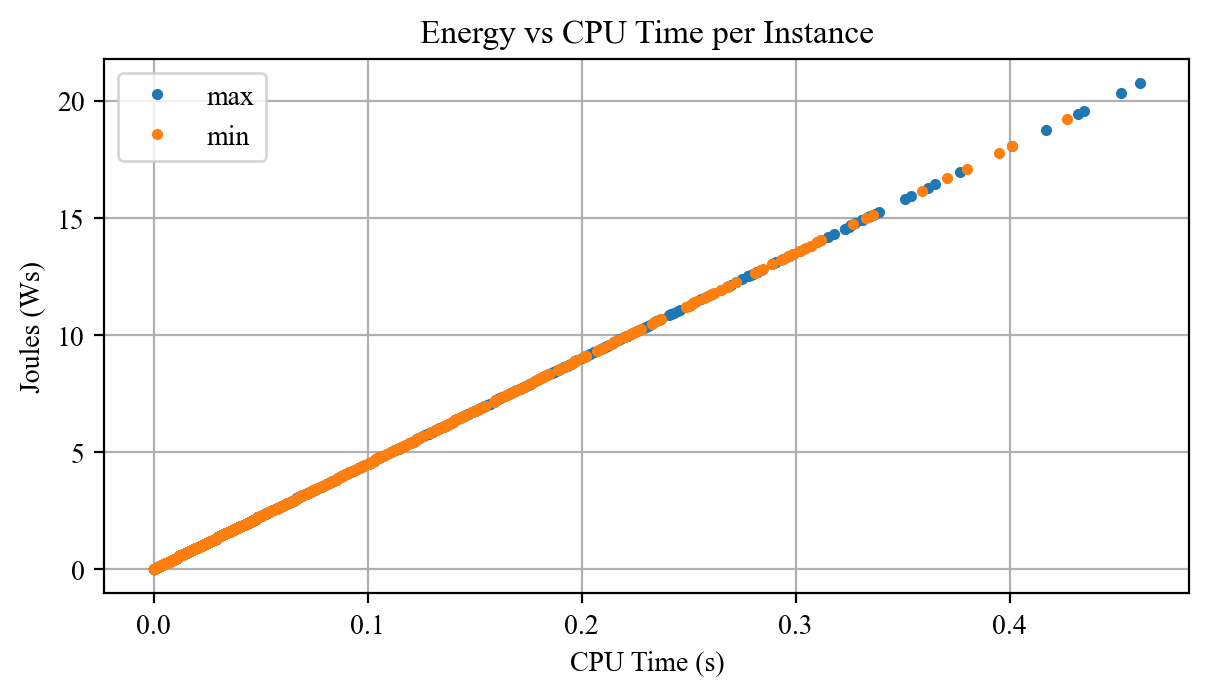

In [403]:
# now putting it all together, energy vs time plot min vs max:

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import matplotlib as mpl

# Plotting
plt.figure(figsize=(7, 3.54), dpi=200)

# Define the indices of the values we want to plot
selected_indices = range(1100)   

# Subset the stats_df DataFrame to include only the selected indices
selected_stats_df = stats_df.iloc[selected_indices]


# Plotting
plt.errorbar(
    x=max_cpu_times, #   selected_stats_df[('cpu_time', 'mean')],  # X-axis: Instance number after sorting
    y=max_energy_use, #    selected_stats_df[('energy_usage_joules', 'mean')],  # Y-axis: Mean CPU time
    fmt='.',  # Format string for the points
    ecolor='red',
    label='max',  # Color of the error bars
    capsize=5  # Caps on the error bars
)


plt.errorbar(
    x=min_cpu_times, #   selected_stats_df[('cpu_time', 'mean')],  # X-axis: Instance number after sorting
    y=min_energy_use, #    selected_stats_df[('energy_usage_joules', 'mean')],  # Y-axis: Mean CPU time
    fmt='.',  # Format string for the points
    ecolor='red',
    label='min',  # Color of the error bars
    capsize=5  # Caps on the error bars
)

plt.xlabel('CPU Time (s)')
plt.ylabel('Joules (Ws)')
plt.title('Energy vs CPU Time per Instance')
plt.grid(True)
plt.legend()
plt.show()

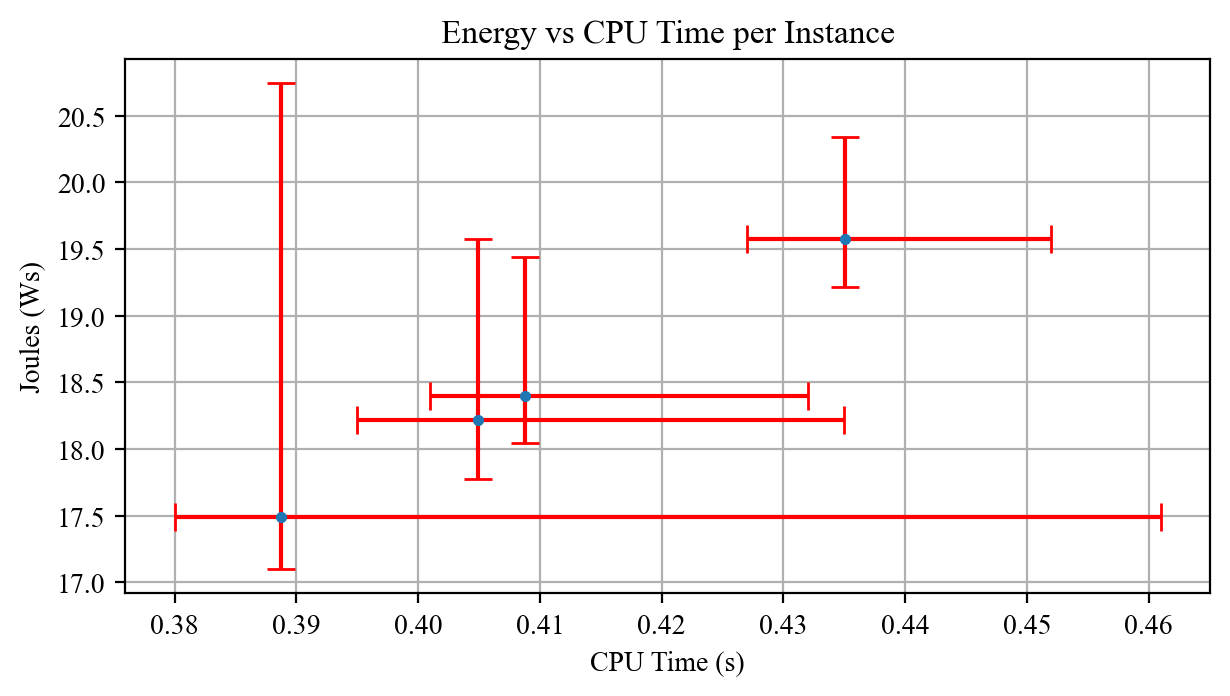

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import matplotlib as mpl

# Assuming 'df' now has multiple cpu_time values for each instance_name
# Group by instance_name to calculate mean and standard deviation for each instance
stats_df = df.groupby('instance_name').agg(['mean', 'std', 'count'])

# Sort the instances by increasing average time to solution
stats_df = stats_df.sort_values(('cpu_time', 'mean'))

# Define the indices of the 10 values you want to plot
selected_indices = [1099, 1098, 1097, 1096]  # Change these indices as needed

# Subset the stats_df DataFrame to include only the selected indices
selected_stats_df = stats_df.iloc[selected_indices]

# Calculate the asymmetric error for the selected data points
min_cpu_times = df.groupby('instance_name')['cpu_time'].min()
max_cpu_times = df.groupby('instance_name')['cpu_time'].max()

min_energy = df.groupby('instance_name')['energy_usage_joules'].min()
max_energy = df.groupby('instance_name')['energy_usage_joules'].max()

asymmetric_error = [
    selected_stats_df[('cpu_time', 'mean')] - min_cpu_times[selected_stats_df.index],
    max_cpu_times[selected_stats_df.index] - selected_stats_df[('cpu_time', 'mean')]
]

asymmetric_error_energy = [
    selected_stats_df[('energy_usage_joules', 'mean')] - min_energy[selected_stats_df.index],
    max_energy[selected_stats_df.index] - selected_stats_df[('energy_usage_joules', 'mean')]
]

# Extract instance names for the selected instances
selected_instance_names = selected_stats_df.index

# Plotting settings
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'

# Plotting
plt.figure(figsize=(7, 3.54), dpi=200)

# Plotting
plt.errorbar(
    x=selected_stats_df[('cpu_time', 'mean')],  # X-axis: Mean CPU time
    y=selected_stats_df[('energy_usage_joules', 'mean')],  # Y-axis: Mean Energy use
    xerr=asymmetric_error,
    yerr=asymmetric_error_energy,    
    fmt='.',  # Format string for the points
    ecolor='red',  # Color of the error bars
    capsize=5  # Caps on the error bars
)

plt.xlabel('CPU Time (s)')
plt.ylabel('Joules (Ws)')
plt.title('Energy vs CPU Time per Instance')
plt.grid(True)

plt.show()

In [ ]:
#import sqlite3
# Code to delete all of the database
# Connect to the database
# DO NOT RUN THIS UNLESS YOU WANT TO DELETE ALL OF THE DATA conn = sqlite3.connect('glucose_data.db')
# DO NOT RUN THIS UNLESS YOU WANT TO DELETE ALL OF THE DATA cursor = conn.cursor()
# Delete all records from the table
# DO NOT RUN THIS UNLESS YOU WANT TO DELETE ALL OF THE DATA cursor.execute('DELETE FROM glucose_data')
# Commit the changes
# DO NOT RUN THIS UNLESS YOU WANT TO DELETE ALL OF THE DATA conn.commit()

#print("All records have been deleted from glucose_data table.")

# Close the connection
#conn.close()